# First assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this Notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 2.1), 2.2), 2.3), 2.4), 2.5) and 3.1). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the homework folder.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: May 09, 2022, 23:55 hrs

In [1]:
import pandas as pd
import numpy as np

**Oktoberfest dataset**

The following cell downloads a dataset from the statistical office of the city of Munich. The dataset contains informations about the Oktoberfest from 1985 to 2019. The cell also prints an overview of all the variables in this dataset.

In [2]:
url = 'https://opendata.muenchen.de/dataset/8d6c8251-7956-4f92-8c96-f79106aab828/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2/download/oktoberfestgesamt19852019.csv'  
wiesn = pd.read_csv(url)
translation = {'jahr': 'year', 'dauer':'duration', 'besucher_gesamt':'visitors_total', 'besucher_tag': 'visitors_day', 
           'bier_preis': 'beer_price', 'bier_konsum': 'beer_consumed', 'hendl_preis':'chicken_price', 'hendl_konsum': 'chicken_consumed'
       }
wiesn.rename(columns=translation,inplace=True)
print(wiesn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              35 non-null     int64  
 1   duration          35 non-null     int64  
 2   visitors_total    35 non-null     float64
 3   visitors_day      35 non-null     int64  
 4   beer_price        35 non-null     float64
 5   beer_consumed     35 non-null     int64  
 6   chicken_price     35 non-null     float64
 7   chicken_consumed  35 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 2.3 KB
None


**Task 1.1**
    
Calculate the pairwise pearson correlation between all pairs of variables. Save the highest positive correlation between a pair of variables into the variable `maxpos` and the maximum negative correlation into `maxneg`! 

In [3]:
# YOUR CODE HERE

corr = wiesn.corr()
corr[corr == 1] = 0

maxpos = corr.max().sort_values(ascending=False)[0]
maxneg = corr.min().sort_values(ascending=False)[-1]

print("Highest positive correlation between two variables: {:.4f}".format(maxpos))
print("Highest negavtive correlation between two variables: {:.4f}".format(maxneg))

Highest positive correlation between two variables: 0.9948
Highest negavtive correlation between two variables: -0.8461


**Task 1.2**

Provide two scatter plots. One has to show the two variables with the highest positive correlation and one will show the variables with the highest negative correlation. Take care that the axes are properly labelled!

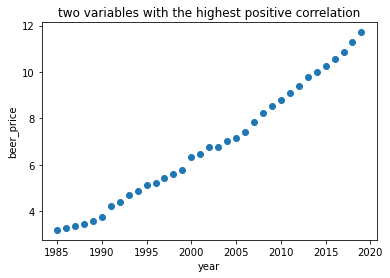

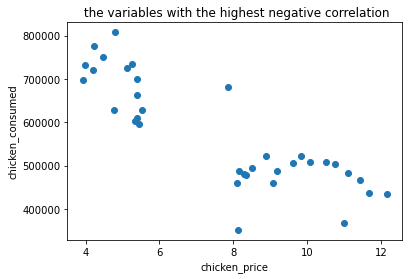

In [4]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.scatter(wiesn.year, wiesn.beer_price)
plt.title('two variables with the highest positive correlation')
plt.xlabel('year')
plt.ylabel('beer_price')
plt.show()
plt.scatter(wiesn.chicken_price, wiesn.chicken_consumed)
plt.title(' the variables with the highest negative correlation')
plt.xlabel('chicken_price')
plt.ylabel('chicken_consumed')
plt.show()

**Task 2.1**

Build a linear-affine model $y_i = ax_i + b$ , where y is the beer price, x is the year, a is the regression coefficient and b is the intercept. Use only the years till the year 2009 to calibrate/train your model. Name the variables `a` and `b`.

In [5]:
# YOUR CODE HERE
x = wiesn.year[0:25]
y = wiesn.beer_price[0:25]
xmean = np.mean(x)
ymean = np.mean(y)
xy = (x-xmean) * (y - ymean)
xx = (x - xmean)**2

a = xy.sum() / xx.sum()
b = ymean - (a * xmean)

print("Coefficient a: {:.4f} euro/year and Intercept b: {:.4f} euro.".format(a,b))

Coefficient a: 0.2231 euro/year and Intercept b: -440.0288 euro.


**Task 2.2**

Given your model from Task 2.1: compute the prediction of the beer price for all available years (1985-2019) using your model. Use `beer_price_predicted` as variable name!

In [6]:
# YOUR CODE HERE
beer_price_predicted  = a*wiesn.year+b


Let us have a look how the prediction looks like - compared to the observed beer price.

| |
|:--:|
|Beer price - predicted vs. observed|
|![beer_price](beer_price_predicted_vs_observed.svg)|
||


**Task 2.3**

Forecast the beer price in the year 2222 with your model from above (name the variable `beer_price2222`)

In [7]:
# YOUR CODE HERE
beer_price2222 = a*2222+b

print("Predicted beer price in the year 2222: {:.2f} euro.".format(beer_price2222))

Predicted beer price in the year 2222: 55.75 euro.


**Task 2.4**

According to your model, what was the beer price `beer_price1810` at the first Oktoberfest in the year 1810?


In [8]:
# YOUR CODE HERE
beer_price1810 = a*1810+b
print("Predicted beer price in the year 1810: {:.2f} euro.".format(beer_price1810))

Predicted beer price in the year 1810: -36.18 euro.


**Task 2.5**

Why is the pearson correlation between `beer_price_predicted` and `year` equal to 1.0?

'a': The model reproduces the original data.

'b': `beer_price_predicted` using your model is a linear combination of the variable year.

'c': `beer_price_predicted` and `year` are statistically independent.

'd': `beer_price` and `year` are statistically independent.

*Use a variable* `x25` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x25='e'`*. There is only one correct answer.* 

In [9]:
# YOUR CODE HERE
x25='b'
print('The answer is ' + x25 + '.')

The answer is b.


**Task 3.1**

You try to further optimize your model by adding more predictors to it. Let's add `beer_consumed` and in a second step also include `visitors_total`. The performance is measured as the mean squared error between the models' predictions and the true beer price on the held out years. Here are your results:

| model  |  predictor(s) |mse   |
|:---:|:---:|:---:|
| 1  | `year`  |  0.596086 |
| 2  | `year, beer_consumed` | 0.524344  |
| 3  |`year, beer_consumed, visitors_total`  |0.526543   |


As you can see the mse on the held out data decreases by adding `beer_consumed` to your model. 
Now you additionally include `visitors_total` to the model, this is model 3. Why is model 3 worse in terms of mean squared error as model 2?
The given correlation loadings plot of a PCA on the dataset might help you to answer the question.

'a': `visotors_total` is more correlated with the 2nd component (`r2`), while `beer_price` is strongly correlated with the 1st component (`r1`). As the principal components in PCA are perpendicular, `visitors_total` will not help to predict the `beer_price` and even degrades the performance.

'b': Using more predictors increases the likelihhod to inclue the best predictor. This result from above is just a random effect and in general not true.

'c': Due to the nature of the convex optimization used to compute the regression coefficients one can show that the optimum number of predictors in linear problems is 2.

'd': `visitors_total` is negatively correlated to the 1st component of the PCA. Only variables which are positively correlated with the 1st components can be used as good predictors.
 
| |
|:--:|
|PCA Correlation Loadings Plot|
|![pca beer dataset](pca.svg "PCA - Correlation Loadings Plot")|
||

*Use a variable* `x31` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x31='e'`*. There is only one correct answer.*

In [37]:
# YOUR CODE HERE
x31='a'
print('The answer is ' + x31 + '.')

The answer is a.
